### Importing required packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm



### Loading Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Inspection

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.shape 

(200, 5)

In [5]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df = df.rename(columns = {"Spending Score (1-100)" : "Spending_Score"})
df = df.rename(columns = {"Annual Income (k$)" : "Annual_Income"})

df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking for null values

In [8]:
print(df.isnull().sum())

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


### Data Visualisation 

### Histogram

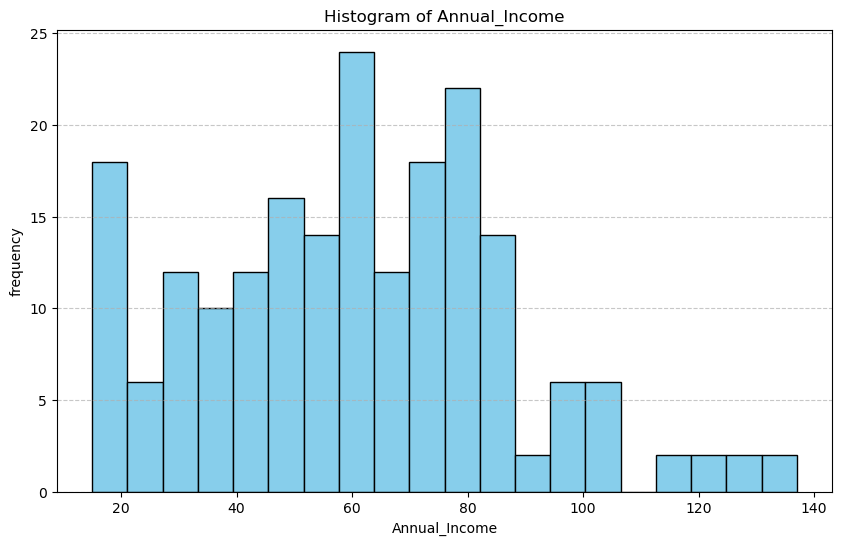

In [9]:

ages = df['Annual_Income']

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Annual_Income')
plt.xlabel('Annual_Income')
plt.ylabel('frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Boxplot

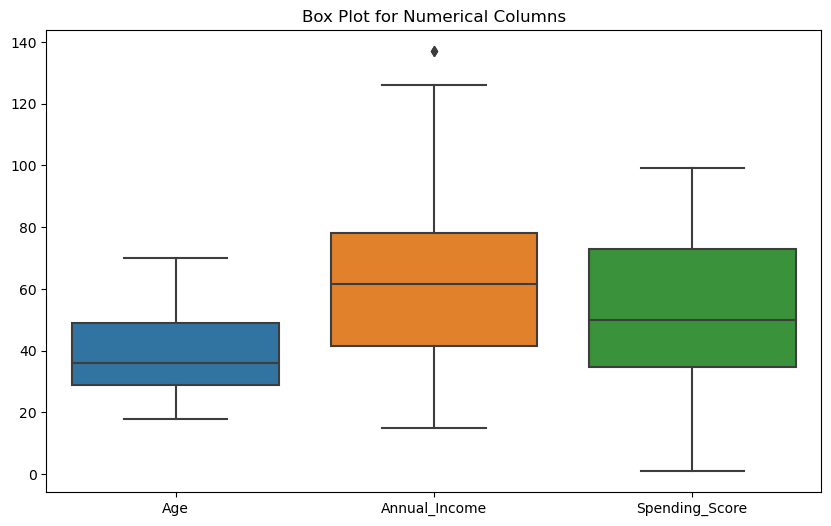

In [10]:
numerical_columns = ['Age', 'Annual_Income', 'Spending_Score']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot for Numerical Columns')
plt.show()

/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

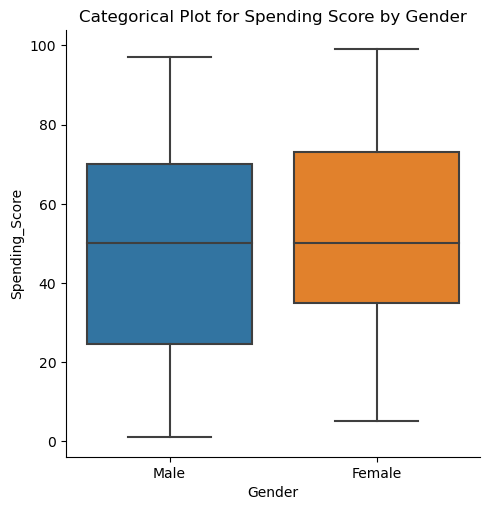

In [11]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Gender', y='Spending_Score', data=df, kind='box')
plt.title('Categorical Plot for Spending Score by Gender')
plt.show()

### Scatterplot

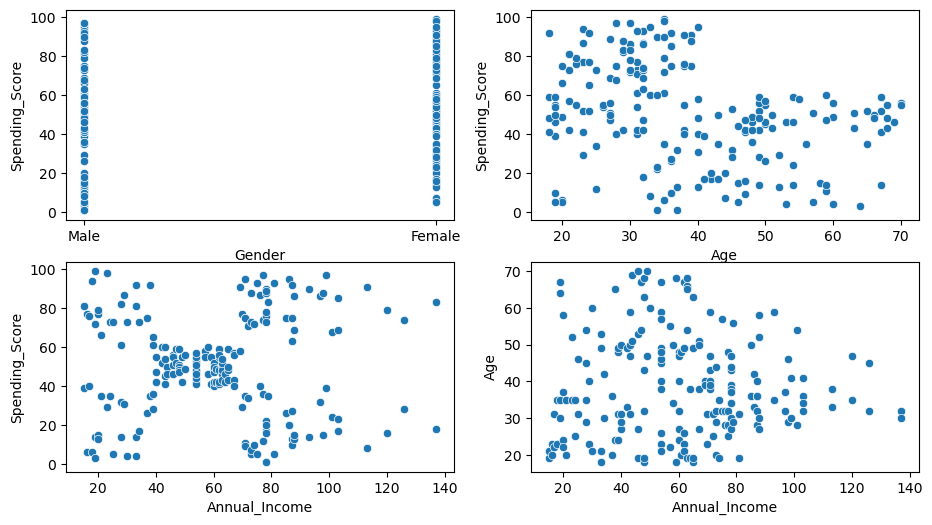

In [12]:

fig, axs = plt.subplots(2,2, figsize = (11,6))
plt1 = sns.scatterplot(data =df, x= 'Gender', y = 'Spending_Score', ax = axs[0,0])
plt1 = sns.scatterplot(data =df, x= 'Age', y = 'Spending_Score', ax = axs[0,1])
plt1 = sns.scatterplot(data =df, x= 'Annual_Income', y = 'Spending_Score', ax = axs[1,0])
plt1 = sns.scatterplot(data =df, x= 'Annual_Income', y = 'Age', ax = axs[1,1])




### Modeling 

#### Ordinary Least Squares model

In [13]:
X = df['Age']
y = df['Spending_Score']
X

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [18]:
X = df['Annual_Income']
y = df['Spending_Score']
X =sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.889
Time:                        19:40:53   Log-Likelihood:                -933.53
No. Observations:                 200   AIC:                             1871.
Df Residuals:                     198   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.6104      4.610     10.761

Based on this model, 'Annual_Income' does not appear to be a statistically significant predictor of 'Spending_Score.' The low R-squared and high p-value suggest that the model does not provide a good fit to the data, and the inclusion of 'Annual_Income' does not improve the model's ability to explain the variance in spending scores.

### OLS using two independent variables

In [15]:
X = df[['Age', 'Annual_Income']]
y = df['Spending_Score']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:         Spending_Score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.42e-05
Time:                        19:40:14   Log-Likelihood:                -922.21
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            73.3479      6.553     11.193

In summary, while the model with 'Age' alone had a similar R-squared value, the addition of 'Annual_Income' did not significantly improve the model's explanatory power. The p-value for 'Annual_Income' suggests that it is not a statistically significant predictor in this context. We can consider evaluating the model with and without 'Annual_Income' and assessing which model performs better based on relevant criteria.

### RANDOM FOREST REGRESSOR

In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataset is stored in a DataFrame called 'df'
# df = pd.read_csv('your_dataset.csv')

# Extracting features and target variable
X = df[['Age', 'Annual_Income']]
y = df['Spending_Score']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 478.8813484029798
R-squared: 0.029110882323047926


The Random Forest Regressor trained on the given features (Age and Annual Income) has a relatively high mean squared error (MSE) of 478.88, indicating a considerable variance between predicted and actual Spending Scores. Additionally, the low R-squared value of 0.03 suggests that the model explains only a small proportion of the variability in the target variable. Further refinement or consideration of additional features may be necessary to improve predictive performance.

### A/B Testing 

In [17]:

df1 = pd.read_csv('Mall_Customers.csv')

df1 = df1.rename(columns = {"Spending Score (1-100)" : "Spending_Score"})
df1 = df1.rename(columns = {"Annual Income (k$)" : "Annual_Income"})

df1['Group'] = [0, 1] * (len(df1) // 2)
control_group = df1[df1['Group'] == 0]['Spending_Score']
treatment_group = df1[df1['Group'] == 1]['Spending_Score']

t_statistic, p_value = ttest_ind(control_group, treatment_group)

print(f'T-Statistic: {t_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print("Statistically significant difference detected. The marketing campaign may have an impact.")
else:
    print("No statistically significant difference detected. The marketing campaign may not have a significant impact.")


T-Statistic: -14.7698
P-Value: 0.0000
Statistically significant difference detected. The marketing campaign may have an impact.


The A/B testing results indicate a statistically significant difference in spending scores between the control and treatment groups, with a t-statistic of -14.7698 and a p-value of 0.0000. The negative t-statistic suggests that the treatment group has a significantly lower mean spending score than the control group. These findings suggest that the marketing campaign may have had a notable impact on customer spending behavior, although practical significance should be considered alongside statistical significance for a comprehensive assessment.